# 1 Implementation of an Autoencoder in Tensor-flow
First we implement a network with the following architecture:
• Input (gray MNIST image)
• Convolution (8 filters)
• Max pooling
• Convolution (4 filters)
• Max pooling
• Convolution (2 filters)
• Transposed convolution (4 filters)
• Convolution (4 filters)
• Transposed convolution (8 filters)
• Convolution (8 filters)
• Output Convolution (1 filter)
Each convolution layer uses [3 × 3] filters with stride 1 and the output convolution uses a [1 × 1] filter with stride 1. Each max pooling or transposed convolution layer uses a pooling or filter size of [2 × 2] and a stride of 2. We use the ’same’ padding of Tensorflow for each layer. Therefore the convolutions will not change the resolution of the features. Each Max pooling will reduce the feature resolution by half and each transposed convolution will double the features resolution because of their strides of 2. Altogether the output resolution should be the same as the input resolution.

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
Step 0: Minibatch Loss: 0.109559
Step 1: Minibatch Loss: 0.090929
Step 100: Minibatch Loss: 0.024345
Step 200: Minibatch Loss: 0.016277
Step 300: Minibatch Loss: 0.014396
Step 400: Minibatch Loss: 0.012019
Step 500: Minibatch Loss: 0.011917
Step 600: Minibatch Loss: 0.012247
Step 700: Minibatch Loss: 0.011325
Step 800: Minibatch Loss: 0.011024
Epoch 0, Training Loss= 0.0112, Validation Loss= 0.0107, Test Loss= 0.0111
Step 0: Minibatch Loss: 0.011728
Step 1: Minibatch Loss: 0.011848
Step 100: Minibatch Loss: 0.011583
Step 200: Minibatch Loss: 0.011415
Step 300: Minibatch Loss: 0.010741
Step 400: Minibatch Loss: 0.

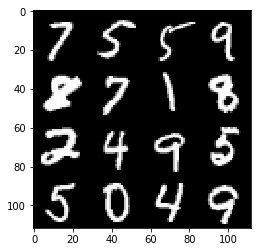

Reconstructed Images


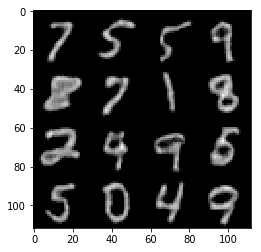

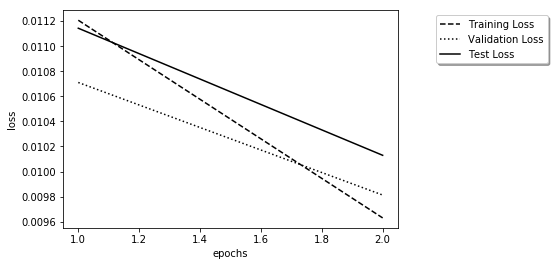

('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
Step 0: Minibatch Loss: 0.118654
Step 1: Minibatch Loss: 0.096459
Step 100: Minibatch Loss: 0.019808
Step 200: Minibatch Loss: 0.013599
Step 300: Minibatch Loss: 0.011444
Step 400: Minibatch Loss: 0.013027
Step 500: Minibatch Loss: 0.010416
Step 600: Minibatch Loss: 0.011776
Step 700: Minibatch Loss: 0.009877
Step 800: Minibatch Loss: 0.010080
Epoch 0, Training Loss= 0.0101, Validation Loss= 0.0100, Test Loss= 0.0096
Step 0: Minibatch Loss: 0.009236
Step 1: Minibatch Loss: 0.010542
Step 100: Minibatch Loss: 0.011911
Step 200: Minibatch Loss: 0.010790
Step 300: Minibatch Loss: 0.010299
Step 400: Minibatch Loss: 0.009982
Step 500: Minibatch Loss: 0.009445
Step 600: Minibatch Loss: 0.009736
Step 700: Minibatch Loss: 0.013957
Step 800: Minibatch Loss: 0.008820
Epoch 1, Training Loss= 0.0091, Validation 

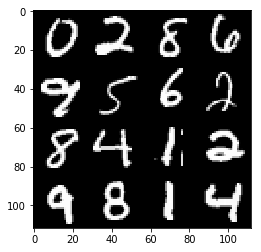

Reconstructed Images


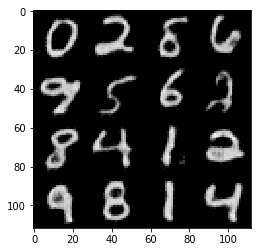

([0.010138898, 0.0091176806],
 [0.01003747, 0.0091675529],
 [0.0095818499, 0.0086172847])

In [16]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import time
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Training Parameters
learning_rate = 0.001
display_step = 10

# Network Parameters
num_input = 784 
n_classes = 10

# Create the neural network
def conv_net(x_train):
    x_train = tf.reshape(x_train, shape=[-1, 28, 28, 1])
    print('input shape : ', x_train.shape)

    conv1 = tf.layers.conv2d(x_train, 8, 3, padding="same", activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(conv1, 2, 2)
    
    conv2 = tf.layers.conv2d(pool1, 4, 3, padding="same", activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(conv2, 2, 2)
    
    conv3 = tf.layers.conv2d(pool2, 2, 3, padding="same", activation=tf.nn.relu)
    trans1 = tf.layers.conv2d_transpose(conv3, 4, 2, 2, padding="same", activation=tf.nn.relu)
    
    conv4 = tf.layers.conv2d(trans1, 4, 3, padding="same", activation=tf.nn.relu)
    trans2 = tf.layers.conv2d_transpose(conv4, 8, 2, 2, padding="same", activation=tf.nn.relu)
    
    conv5 = tf.layers.conv2d(trans2, 8, 3, padding="same", activation=tf.nn.relu)
    output = tf.layers.conv2d(conv5, 1, 1, padding="same", activation=tf.nn.relu)
    print('input shape : ', output.shape)
    
    return x_train, output


def conv_net_train(total_epochs = 5, learning_rate = 0.1, batch_size = 64, evaluation = True):
    
    # TensorFlow Graph input
    X = tf.placeholder(tf.float32, [None, num_input])
    
    x_train, network_output = conv_net(X)
    loss_operation = tf.reduce_mean(tf.square(network_output - x_train))
    
    #print(loss_operation.eval())
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_operation = optimizer.minimize(loss=loss_operation)

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()

    
    train_loss_list = list()
    val_loss_list = list()
    test_loss_list = list()
    
    # Start training
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)
        
        max_steps = int(mnist.train.num_examples/batch_size)
        for epoch in range(total_epochs):
            for step in range(max_steps):
                batch_x, batch_y = mnist.train.next_batch(batch_size)
                _, l = sess.run([train_operation, loss_operation], feed_dict={X: batch_x})
                if step % 100 == 0 or step == 1:
                    print('Step %i: Minibatch Loss: %f' % (step, l))
            if evaluation:
                _, train_loss = sess.run([train_operation, loss_operation], feed_dict={X: mnist.train.images[:1000]})

                _, validation_loss = sess.run([train_operation, loss_operation], feed_dict={X: mnist.validation.images[:1000]})

                _, test_loss = sess.run([train_operation, loss_operation], feed_dict={X: mnist.test.images[:1000]})                                                            

                print("Epoch " + str(epoch) + ", Training Loss= " + \
                "{:.4f}".format(train_loss) + ", Validation Loss= " + \
                "{:.4f}".format(validation_loss) + ", Test Loss= " + \
                "{:.4f}".format(test_loss))

                train_loss_list.append(train_loss)
                val_loss_list.append(validation_loss)
                test_loss_list.append(test_loss)
                    
        n = 4
        canvas_orig = np.empty((28 * n, 28 * n))
        canvas_recon = np.empty((28 * n, 28 * n))
        for i in range(n):
            # MNIST test set
            batch_x, _ = mnist.test.next_batch(n)
            # Encode and decode the digit image
            _, g = sess.run([x_train, network_output], feed_dict={X: batch_x})

            # Display original images
            for j in range(n):
                # Draw the original digits
                canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                    batch_x[j].reshape([28, 28])
            # Display reconstructed images
            for j in range(n):
                # Draw the reconstructed digits
                canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                    g[j].reshape([28, 28])

        print("Original Images")
        plt.figure(figsize=(n, n))
        plt.imshow(canvas_orig, origin="upper", cmap="gray")
        plt.show()


        print("Reconstructed Images")
        plt.figure(figsize=(n, n))
        plt.imshow(canvas_recon, origin="upper", cmap="gray")
        plt.show()
        return (train_loss_list, val_loss_list, test_loss_list)

def show_accuracy_plot():
    loss_list = conv_net_train(learning_rate=0.01, total_epochs=2)
    plt.plot(range(1,len(loss_list[0]) + 1), loss_list[0], 'k--' ,label='Training Loss')
    plt.plot(range(1,len(loss_list[1]) + 1), loss_list[1], 'k:' , label='Validation Loss')
    plt.plot(range(1,len(loss_list[2]) + 1), loss_list[2], 'k' ,label='Test Loss')
    plt.legend(bbox_to_anchor=(1.1, 1), loc=2, shadow=True)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.savefig('all_loss.png', bbox_inches='tight')
    plt.show()
    
show_accuracy_plot()

conv_net_train(learning_rate=0.01, total_epochs=2)

# 2 Training of the Autoencoder
We train the network by optimizing the sum of L2 losses between each pixel of the network output tensor and the gray value of the input MNIST image of the according pixel. We divide the total loss by the total number of pixels. No softmax operation is needed. In tensorflow this can be implemented by using: loss = tf.reduce mean(tf.square(network output − input image placeholder)) We scale every MNIST image gray value to values between 0 and 1. The MNIST
image labels are not used for this exercise. Use a batch size of 64 and the Adam optimizer. Try out different learning
rates: 0.1, 0.01, 0.001. Plot the according learning curves. After the training, generate a sample of MNIST images that the autoencoder creates and plot them.

# 2 Changing the Learning Rate
After implementing our neural networks and making sure that it works correctly, we will have a look on the effect of the learning rate on the network’s performance. Try the following values for the learning rate: {0.1, 0.01, 0.001, 0.0001}, save the results (validation performance after each epoch) and plot all learning curves in the same figure. Which conclusions could be drawn from this figure? Which value for the learning rate works best.

('Starting training for learning rate : ', 0.1)
('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
Step 0: Minibatch Loss: 0.106428
Step 1: Minibatch Loss: 1406.996948
Step 100: Minibatch Loss: 0.117751
Step 200: Minibatch Loss: 0.105472
Step 300: Minibatch Loss: 0.117818
Step 400: Minibatch Loss: 0.110961
Step 500: Minibatch Loss: 0.116348
Step 600: Minibatch Loss: 0.116093
Step 700: Minibatch Loss: 0.110626
Step 800: Minibatch Loss: 0.114419
Epoch 0, Training Loss= 0.1133, Validation Loss= 0.1096, Test Loss= 0.1143
Step 0: Minibatch Loss: 0.111106
Step 1: Minibatch Loss: 0.109007
Step 100: Minibatch Loss: 0.108067
Step 200: Minibatch Loss: 0.111534
Step 300: Minibatch Loss: 0.106441
Step 400: Minibatch Loss: 0.108889
Step 500: Minibatch Loss: 0.109394
Step 600: Minibatch Loss: 0.105445
Step 700: Minibatch Loss: 0.115865
Step 800: Minibatch Loss: 0

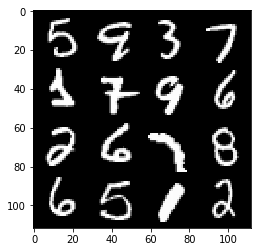

Reconstructed Images


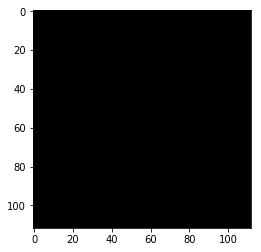

('Starting training for learning rate : ', 0.01)
('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
Step 0: Minibatch Loss: 0.112046
Step 1: Minibatch Loss: 0.098506
Step 100: Minibatch Loss: 0.021536
Step 200: Minibatch Loss: 0.020059
Step 300: Minibatch Loss: 0.014614
Step 400: Minibatch Loss: 0.015408
Step 500: Minibatch Loss: 0.014598
Step 600: Minibatch Loss: 0.012048
Step 700: Minibatch Loss: 0.011108
Step 800: Minibatch Loss: 0.012587
Epoch 0, Training Loss= 0.0111, Validation Loss= 0.0115, Test Loss= 0.0125
Step 0: Minibatch Loss: 0.011486
Step 1: Minibatch Loss: 0.010361
Step 100: Minibatch Loss: 0.011393
Step 200: Minibatch Loss: 0.010777
Step 300: Minibatch Loss: 0.011061
Step 400: Minibatch Loss: 0.010933
Step 500: Minibatch Loss: 0.010749
Step 600: Minibatch Loss: 0.010595
Step 700: Minibatch Loss: 0.011081
Step 800: Minibatch Loss: 0.0

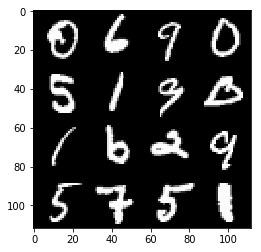

Reconstructed Images


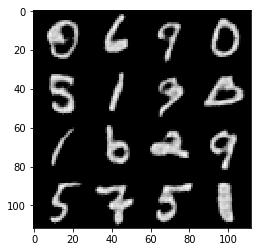

('Starting training for learning rate : ', 0.001)
('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
Step 0: Minibatch Loss: 0.115406
Step 1: Minibatch Loss: 0.106328
Step 100: Minibatch Loss: 0.038366
Step 200: Minibatch Loss: 0.027282
Step 300: Minibatch Loss: 0.022470
Step 400: Minibatch Loss: 0.017943
Step 500: Minibatch Loss: 0.016240
Step 600: Minibatch Loss: 0.014072
Step 700: Minibatch Loss: 0.012958
Step 800: Minibatch Loss: 0.011990
Epoch 0, Training Loss= 0.0122, Validation Loss= 0.0118, Test Loss= 0.0117
Step 0: Minibatch Loss: 0.012693
Step 1: Minibatch Loss: 0.010805
Step 100: Minibatch Loss: 0.010436
Step 200: Minibatch Loss: 0.010158
Step 300: Minibatch Loss: 0.011052
Step 400: Minibatch Loss: 0.010910
Step 500: Minibatch Loss: 0.009518
Step 600: Minibatch Loss: 0.009682
Step 700: Minibatch Loss: 0.009812
Step 800: Minibatch Loss: 0.

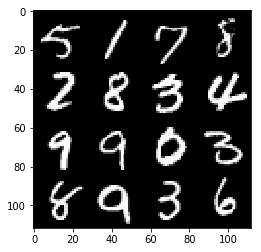

Reconstructed Images


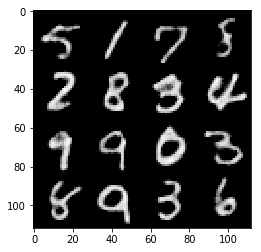

('Starting training for learning rate : ', 0.0001)
('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
('input shape : ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)]))
Step 0: Minibatch Loss: 0.111299
Step 1: Minibatch Loss: 0.104895
Step 100: Minibatch Loss: 0.087441
Step 200: Minibatch Loss: 0.083939
Step 300: Minibatch Loss: 0.065158
Step 400: Minibatch Loss: 0.054031
Step 500: Minibatch Loss: 0.047747
Step 600: Minibatch Loss: 0.043499
Step 700: Minibatch Loss: 0.037744
Step 800: Minibatch Loss: 0.034237
Epoch 0, Training Loss= 0.0324, Validation Loss= 0.0312, Test Loss= 0.0316
Step 0: Minibatch Loss: 0.032493
Step 1: Minibatch Loss: 0.031412
Step 100: Minibatch Loss: 0.028748
Step 200: Minibatch Loss: 0.027540
Step 300: Minibatch Loss: 0.024995
Step 400: Minibatch Loss: 0.024429
Step 500: Minibatch Loss: 0.022396
Step 600: Minibatch Loss: 0.022811
Step 700: Minibatch Loss: 0.023300
Step 800: Minibatch Loss: 0

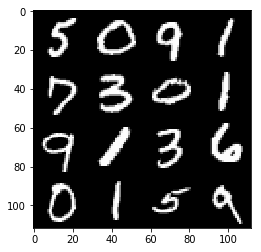

Reconstructed Images


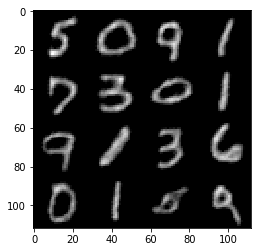

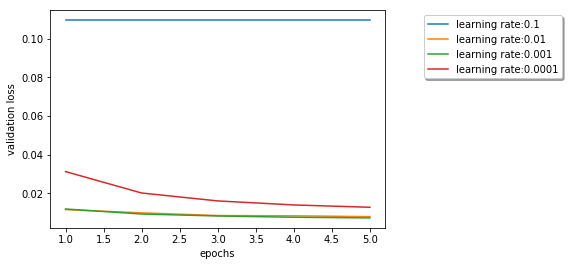

In [18]:
validation_loss_list = list()
learning_rates_list = [0.1, 0.01, 0.001, 0.0001]
for lrate in learning_rates_list:
    print("Starting training for learning rate : ",lrate)
    loss_list = conv_net_train(learning_rate=lrate, total_epochs=5)
    validation_loss_list.append(loss_list[1])

for iterator, val_loss in enumerate(validation_loss_list):
    plt.plot(range(1,len(val_loss) + 1), val_loss, label='learning rate:%s' % learning_rates_list[iterator])
    plt.xlabel('epochs')
    plt.ylabel('validation loss')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, shadow=True)
plt.savefig('learning_rate.png')
plt.show()